In [1]:
libname anger 'C:\Users\solid\Google Drive\courses\PHD_2_Reading Course\data\clean';
ods graphics on / LOESSOBSMAX = 15000 ;

SAS Connection established. Subprocess id is 11456



In [2]:
data anger.second;
set anger.v2;

/*r id*/
rcaseid = C0000100;

/*******************************************************************************************************
demographics | time invariant controls
*******************************************************************************************************;
/*gender*/
IF C0005400 =2 THEN female =1; ELSE female =0;

/*label C0005700 = "DATE OF BIRTH OF CHILD - YEAR"; */
r_birthy = C0005700;

array aage (3) age_08 age_10 age_12;

do i=1 to 3;
aage(i) = 2006+(i*2) - r_birthy; /*age at first wave constructed for visualizations*/
end;

/*race*/
race = C0005300;

/*coded from mother's ethic group from scr*/
if C0005300 = 1 then hisp = 1; else if C0005300 =. then hisp =.; else hisp =0;
if C0005300 =2 then black =1; else if C0005300 =. then black =.; else black =0;

/*******************************************************************************************************
focal dependent var. 3 waves: 08,10,12

SET UP THREE SIDE BY SIDE - I AM GUESSING IT IS BEST TO FOCUS ON PREDICTING ONE WAVE
*******************************************************************************************************;
/*
Y2235800	# DAYS IN PAST WEEK R FELT ANNOYED OR FRUSTRATED 2008
Y2235900	# DAYS IN PAST WEEK R FELT ANGRY 2008
Y2236000	# DAYS IN PAST WEEK R FELT VERY CRITICAL OF OTHERS 2008
Y2236100	# DAYS IN PAST WEEK R YELLED AT SOMEONE OR SMTHG 2008
Y2236200	# DAYS IN PAST WEEK R FELT RAGE 2008
Y2236300	# DAYS IN PAST WEEK R LOST TEMPER 2008
*/
/*counting waves of data -N counts number of non-missing */

anger_valid_08 = N(Y2235800 , Y2235900 , Y2236000 , Y2236100 , Y2236200 , Y2236300);
anger_valid_10 = N(Y2587800 , Y2587900 , Y2588000 , Y2588100 , Y2588200 , Y2588300);
anger_valid_12 = N(Y2935800 , Y2935900 , Y2936000 , Y2936100 , Y2936200 , Y2936300);

/*different measures for visualizations. primary is sum of symptom day measures. Range is 0 to 42*/
anger_08 =(Y2235800 + Y2235900 + Y2236000 + Y2236100 + Y2236200 + Y2236300);
anger_10 =(Y2587800 + Y2587900 + Y2588000 + Y2588100 + Y2588200 + Y2588300);
anger_12 =(Y2935800 + Y2935900 + Y2936000 + Y2936100 + Y2936200 + Y2936300);

anger_08_wkavg	=(Y2235800	+	Y2235900	+	Y2236000	+	Y2236100	+	Y2236200	+	Y2236300)/6;
anger_10_wkavg	=(Y2587800	+	Y2587900	+	Y2588000	+	Y2588100	+	Y2588200	+	Y2588300)/6;
anger_12_wkavg	=(Y2935800	+	Y2935900	+	Y2936000	+	Y2936100	+	Y2936200	+	Y2936300)/6;

anger_perday_08 =(Y2235800 + Y2235900 + Y2236000 + Y2236100 + Y2236200 + Y2236300)/7;
anger_perday_10 =(Y2587800 + Y2587900 + Y2588000 + Y2588100 + Y2588200 + Y2588300)/7;
anger_perday_12 =(Y2935800 + Y2935900 + Y2936000 + Y2936100 + Y2936200 + Y2936300)/7;

/********************************************************************************************************
indep var : self concepts section
esteem and mastery items reversed scores as appropriate per nlsy doc. THESE ARE LESS 7 TO MAKE THE INTECEPT MEANINGFUL
*******************************************************************************************************;

/*04 - staggered, so next wave is those not interviewed in this wave*/
mastery_04 = ( (5- Y1645800 ) + (5- Y1645900 ) + (5- Y1646000 ) + ( Y1646100 ) + (5- Y1646200 ) + ( Y1646300 ) + (5- Y1646400 )) -7 ;
esteem_04 = ( Y1646500) + (  Y1646600) + ( 4- Y1646700) + (  Y1646800) + ( 4- Y1646900) + (  Y1647000) + (  Y1647100) + ( 4- Y1647200) + ( 4- Y1647300) + ( 4- Y1647400);

/*06*/

mastery_06 = ( (5- Y1917600 ) + (5- Y1917700 ) + (5- Y1917800 ) + ( Y1917900 ) + (5- Y1918000 ) + ( Y1918100 ) + (5- Y1918200 )  )-7;
esteem_06 = ( Y1918300) + ( Y1918400) + (4- Y1918500) + ( Y1918600) + (4- Y1918700) + ( Y1918800) + ( Y1918900) + (4- Y1919000) + (4- Y1919100) + (4- Y1919200);

/*then dealing with missing*/
mastery_missing_04 = nmiss(Y1645800 , Y1645900 , Y1646000 , Y1646100 , Y1646200 , Y1646300 , Y1646400 );
mastery_missing_06 = nmiss(Y1917600 , Y1917700 , Y1917800 , Y1917900 , Y1918000 , Y1918100 , Y1918200);
if nmiss(Y1645800 , Y1645900 , Y1646000 , Y1646100 , Y1646200 , Y1646300 , Y1646400 ) >0 then mastery04 =. ;
if nmiss(Y1917600 , Y1917700 , Y1917800 , Y1917900 , Y1918000 , Y1918100 , Y1918200) >0 then mastery06 =. ;

esteem_missing_06 = nmiss( Y1918300 , Y1918400 , Y1918500 , Y1918600 , Y1918700 , Y1918800 , Y1918900 , Y1919000 , Y1919100 , Y1919200 );
esteem_missing_04 = nmiss( Y1646500 , Y1646600 , Y1646700 , Y1646800 , Y1646900 , Y1647000 , Y1647100 , Y1647200 , Y1647300 , Y1647400 );
if nmiss ( Y1918300 , Y1918400 , Y1918500 , Y1918600 , Y1918700 , Y1918800 , Y1918900 , Y1919000 , Y1919100 , Y1919200 ) >0 then esteem_06 =. ;
if nmiss ( Y1646500 , Y1646600 , Y1646700 , Y1646800 , Y1646900 , Y1647000 , Y1647100 , Y1647200 , Y1647300 , Y1647400 ) >0 then esteem_04 =. ;


/*staggered nature of sample means that we are cutting sample by using any wave
to test sensitivity of each year /subsample, I also combine these years*/
mastery_waves = N(mastery_04 , mastery_06);
esteem_waves = N(esteem_04 , esteem_06);

mastery = max(mastery_04 , mastery_06); 
esteem = max(esteem_04 , esteem_06);
/*not sure if max is best choice - but this concatenates the staggered waves*/


/********************************************************************************************************
time varying controls:
HIGHEST GRADE OF SCHOOL COMPLETED
NUMBER OF HOUSEHOLD MEMBERS IN HH OF R
OFFICIAL MARITAL STATUS
COHABITATION STATUS OF R
WORK STATUS AT DATE OF INTERVIEW - CONSTRUCTED

*******************************************************************************************************;
/*Y1672900	HIGHEST GRADE OF SCHOOL COMPLETED AS OF 2004 — ref group is high school education
Y1672900	Y1948700	Y2267300	Y2616200	Y2966600 
HGC @ ANY TIME : less_hs hs some_col col grad*/

array hcg (5) Y1672900 Y1948700 Y2267300 Y2616200 Y2966600;
array educ (5) grade_04 grade_06 grade_08 grade_10 grade_12;

do i =1 to 5;
if hcg(i) = . then educ(i) =. ; else educ(i)= hcg(i);
if educ(i) > 95 or educ(i) =0 then educ(i)=.;
end;

if max(grade_04 , grade_06 , grade_08 , grade_10 , grade_12)<12 then less_hs=1; else less_hs=0;
if max(grade_04 , grade_06 , grade_08 , grade_10 , grade_12)=12 then hs=1; else hs=0;
if 12<max(grade_04 , grade_06 , grade_08 , grade_10 , grade_12)<16 then some_col=1; else some_col=0;
if max(grade_04 , grade_06 , grade_08 , grade_10 , grade_12)=16 then col=1; else col=0;
if max(grade_04 , grade_06 , grade_08 , grade_10 , grade_12)>16 then grad=1; else grad=0;


/*Y1673000	NUMBER OF HOUSEHOLD MEMBERS IN HH OF R	2004
Y1673000 Y1948800 Y2267400 Y2616300 Y2966800 */
array hhmem(5) Y1673000 Y1948800 Y2267400 Y2616300 Y2966800;
array hhsize (5) hhsize_04 hhsize_06 hhsize_08 hhsize_10 hhsize_12;
do i=1 to 5;
if hhmem(i)>0 then hhsize(i) = hhmem(i); else hhmem(i)=.;
end;

/*Y1673100	MARSTAT2004	OFFICIAL MARITAL STATUS 2004 — reference group is never married
Y1673100 Y1948900 Y2267500 Y2616400 Y2966900 */
array marstat (5) Y1673100 Y1948900 Y2267500 Y2616400 Y2966900;
array mar (5) mar_04 mar_06 mar_08 mar_10 mar_12;
array sep (5) sep_04 sep_06 sep_08 sep_10 sep_12 ;
array div (5) div_04 div_06 div_08 div_10 div_12 ; 
array wid (5) wid_04 wid_06 wid_08 wid_10 wid_12 ;
do i=1 to 5;
if marstat(i) =. then mar(i)=. and sep(i)=. and div(i)=. and wid(i)=.;
if marstat(i)=1 then mar(i) = marstat(i); else mar(i)=0;
if marstat(i)=2 then sep(i) = marstat(i); else sep(i)=0;
if marstat(i)=3 then div(i) = marstat(i); else div(i)=0;
if marstat(i)=6 then wid(i) = marstat(i); else wid(i)=0;
end;

/*Y1673200	COHAB2004	COHABITATION STATUS OF R	2004
Y1673200 Y1949000 Y2267600 Y2616500 Y2967000 */
array cohab (5) Y1673200 Y1949000 Y2267600 Y2616500 Y2967000;
array habit (5) cohab_04 cohab_06 cohab_08 cohab_10 cohab_12 ;
do i=1 to 5;
if cohab(i) ne . then habit(i) = cohab(i); else habit(i)=.;
end;

/*Y1688802	WORK04	WORK STATUS AT DATE OF INTERVIEW - CONSTRUCTED	2004
Y1688802	Y1975702	Y2284502	Y2616903	Y2985700 */
array work (5) Y1688802	Y1975702 Y2284502 Y2616903 Y2985700;
array woork (5) fulltime_04 fulltime_06 fulltime_08 fulltime_10 fulltime_12 ;
array wooork (5) parttime_04 parttime_06 parttime_08 parttime_10 parttime_12 ;
do i=1 to 5;
if work(i) =2 then woork(i)=1; else if work(i)=. then woork(i)=.; else woork(i)=0;
if work(i) =1 then wooork(i) =1; else if work(i)=. then wooork(i)=.; else wooork(i)=0;
end;


/*DROP ALL RESPONDENTS WHO DO NOT HAVE ANY MEASURES OF SELF-CONCEPT -  this has to be tested*/
IF MASTERY_WAVES =0 and ESTEEM_WAVES =0 THEN DELETE;
run; 



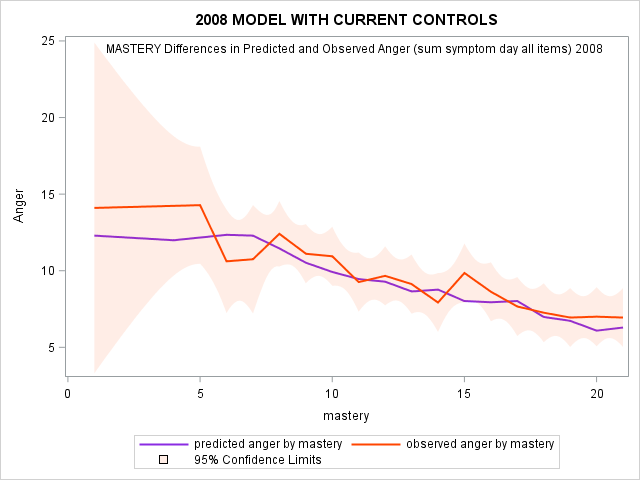
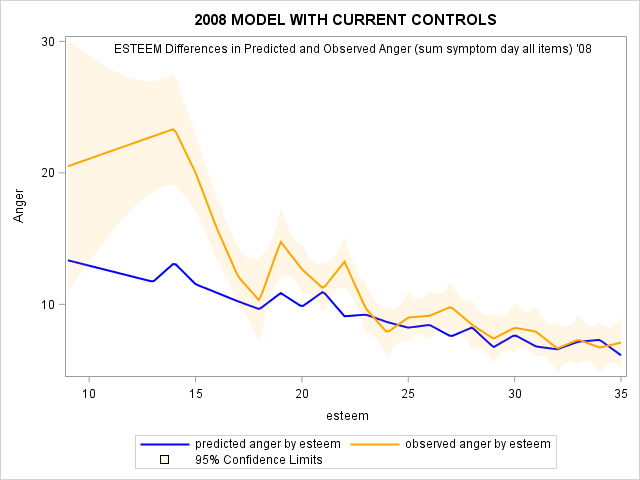

In [3]:
/*models with full controls - and highest grade ever completed regardless of year */
title "2008 MODEL WITH CURRENT CONTROLS";
/*2008*/
proc genmod data=anger.second;
model anger_08 =  mastery esteem female hisp black age_08 less_hs some_col col grad fulltime_08 parttime_08 cohab_08 hhsize_08 mar_08 sep_08 div_08 wid_08
 / link=log dist = negbin  scale=d ;
 output out=vis_08 predicted=p ;
 run;
proc sgplot data=vis_08;
inset (' '=  "MASTERY Differences in Predicted and Observed Anger (sum symptom day all items) 2008") / position=top;
yaxis label= "Anger";
loess x=MASTERY y=p / name="predicted" legendLabel="predicted anger by mastery" lineattrs=(color=blueviolet) nomarkers;
loess x=MASTERY y=anger_08 / name="observed" legendLabel="observed anger by mastery" nomarkers lineattrs=(color=orangered)
smooth=.01 CLM alpha=.05 clmattrs=(clmfillattrs=(color=orangered transparency=.9));
discretelegend "predicted" "observed";
RUN;
proc sgplot data=vis_08;
inset (' '=  "ESTEEM Differences in Predicted and Observed Anger (sum symptom day all items) '08") / position=top;
yaxis label= "Anger";
loess x=esteem y=p / name="predicted" legendLabel="predicted anger by esteem" lineattrs=(color=blue) nomarkers;
loess x=esteem y=anger_08 / name="observed" legendLabel="observed anger by esteem" nomarkers lineattrs=(color=orange)
smooth=.01 CLM alpha=.05 clmattrs=(clmfillattrs=(color=orange transparency=.9));
discretelegend "predicted" "observed";
RUN;




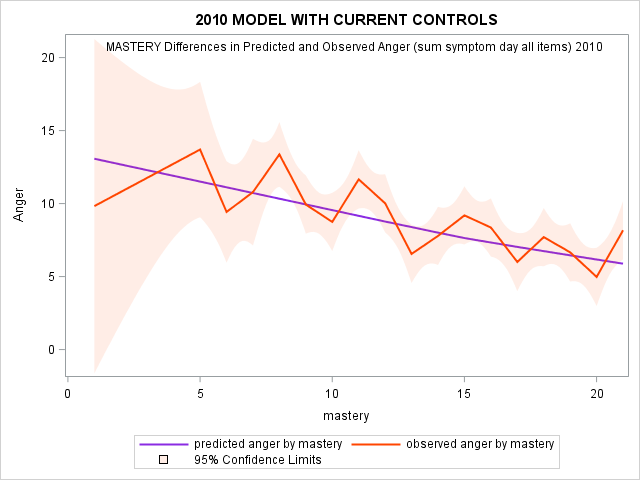
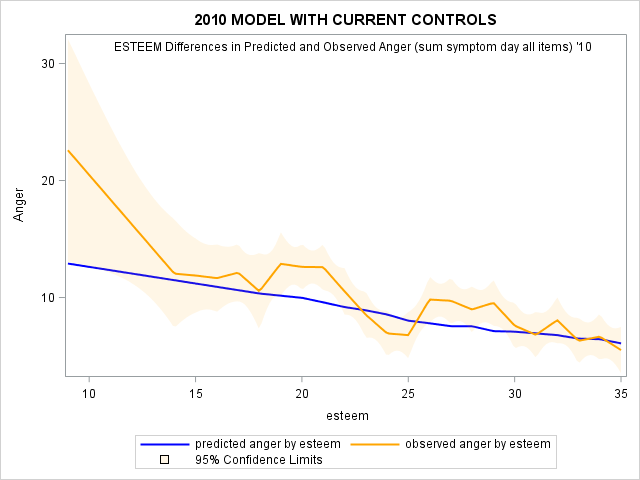

In [4]:
/*2010*/
title "2010 MODEL WITH CURRENT CONTROLS";
proc genmod data=anger.second;
model anger_10 = mastery esteem female hisp black age_10 less_hs some_col col grad fulltime_10 parttime_10 cohab_10 hhsize_10 mar_10 sep_10 div_10 wid_10
 / link=log dist = negbin scale=d ;
 output out=vis_10 predicted=p ;
 run;
proc sgplot data=vis_10;
inset (' '=  "MASTERY Differences in Predicted and Observed Anger (sum symptom day all items) 2010") / position=top;
yaxis label= "Anger";
loess x=MASTERY y=p / name="predicted" legendLabel="predicted anger by mastery" lineattrs=(color=blueviolet) nomarkers;
loess x=MASTERY y=anger_10 / name="observed" legendLabel="observed anger by mastery" nomarkers lineattrs=(color=orangered)
smooth=.01 CLM alpha=.05 clmattrs=(clmfillattrs=(color=orangered transparency=.9));
discretelegend "predicted" "observed";
RUN;
proc sgplot data=vis_10;
inset (' '=  "ESTEEM Differences in Predicted and Observed Anger (sum symptom day all items) '10") / position=top;
yaxis label= "Anger";
loess x=esteem y=p / name="predicted" legendLabel="predicted anger by esteem" lineattrs=(color=blue) nomarkers;
loess x=esteem y=anger_10 / name="observed" legendLabel="observed anger by esteem" nomarkers lineattrs=(color=orange)
smooth=.01 CLM alpha=.05 clmattrs=(clmfillattrs=(color=orange transparency=.9));
discretelegend "predicted" "observed";
RUN;



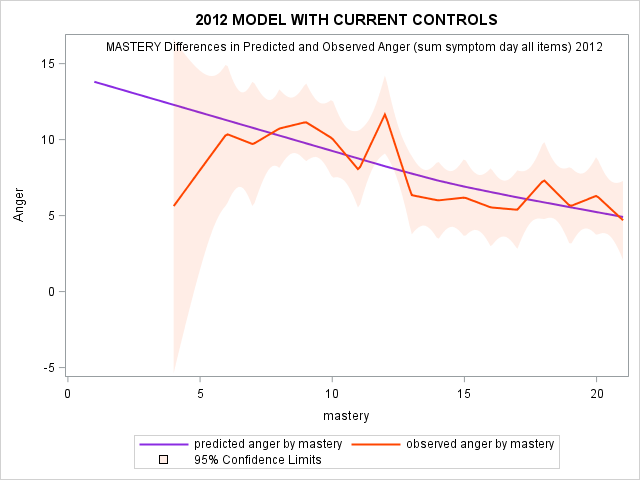
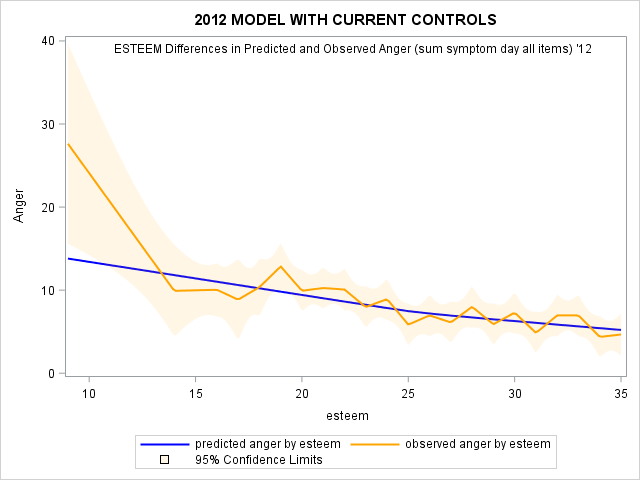

In [5]:
/*2012*/
title "2012 MODEL WITH CURRENT CONTROLS";
proc genmod data=anger.second;
model anger_12 =   mastery esteem female hisp black age_12 less_hs some_col col grad fulltime_12 parttime_12 cohab_12 hhsize_12 mar_12 sep_12 div_12 wid_12
 / link=log dist = negbin scale=d ;
 output out=vis_12 predicted=p ;
 run;
proc sgplot data=vis_12;
inset (' '=  "MASTERY Differences in Predicted and Observed Anger (sum symptom day all items) 2012") / position=top;
yaxis label= "Anger";
loess x=MASTERY y=p / name="predicted" legendLabel="predicted anger by mastery" lineattrs=(color=blueviolet) nomarkers;
loess x=MASTERY y=anger_12 / name="observed" legendLabel="observed anger by mastery" nomarkers lineattrs=(color=orangered)
smooth=.01 CLM alpha=.05 clmattrs=(clmfillattrs=(color=orangered transparency=.9));
discretelegend "predicted" "observed";
RUN;
proc sgplot data=vis_12;
inset (' '=  "ESTEEM Differences in Predicted and Observed Anger (sum symptom day all items) '12") / position=top;
yaxis label= "Anger";
loess x=esteem y=p / name="predicted" legendLabel="predicted anger by esteem" lineattrs=(color=blue) nomarkers;
loess x=esteem y=anger_12 / name="observed" legendLabel="observed anger by esteem" nomarkers lineattrs=(color=orange)
smooth=.01 CLM alpha=.05 clmattrs=(clmfillattrs=(color=orange transparency=.9));
discretelegend "predicted" "observed";
RUN;	



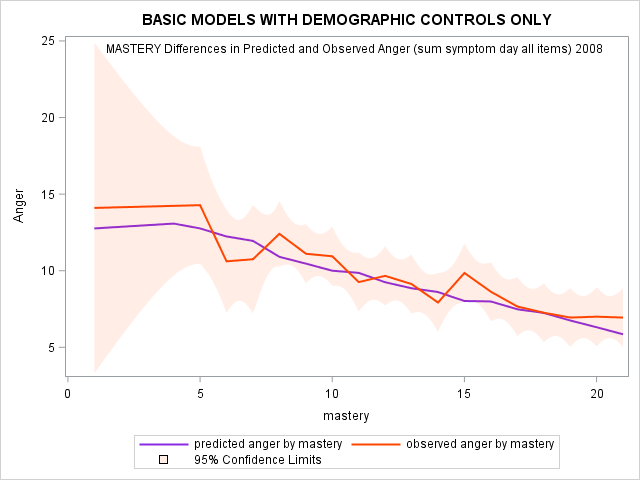
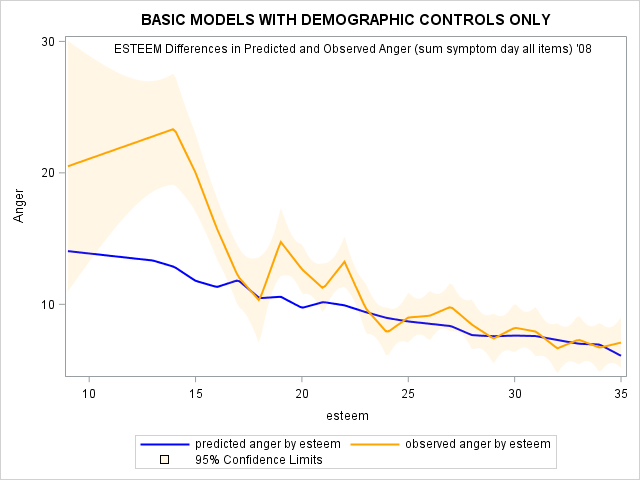
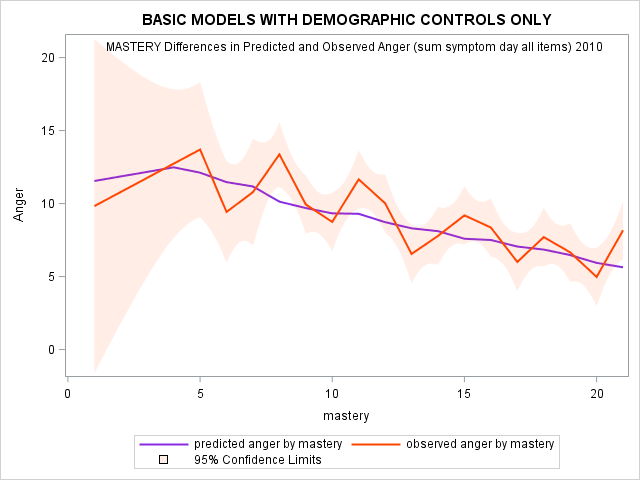
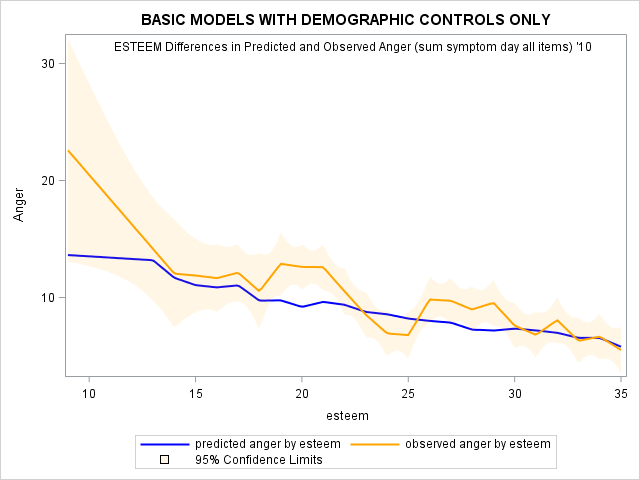
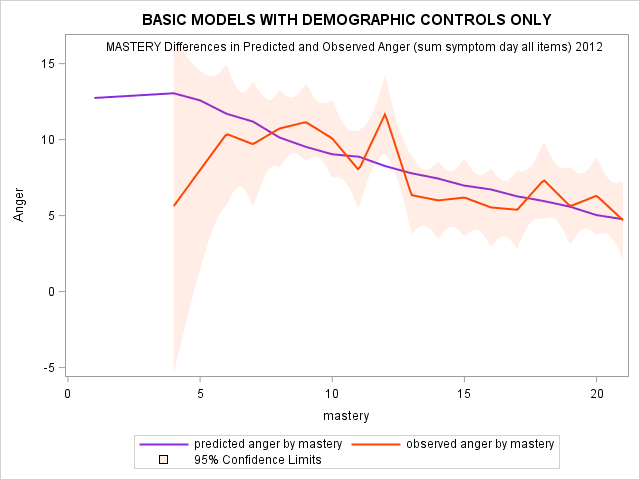
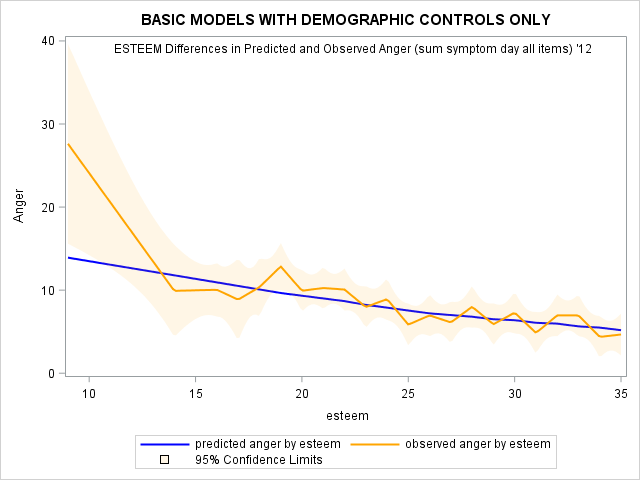

In [6]:
/*BASIC MODELS WITH ONLY DEMOGRAPHIC CONTROLS */
title "BASIC MODELS WITH DEMOGRAPHIC CONTROLS ONLY";
/*2008*/
proc genmod data=anger.second;
model anger_08 =  mastery esteem female hisp black age_08
 / link=log dist = negbin scale=d ;
 output out=vis_08 predicted=p ;
 run;
proc sgplot data=vis_08;
inset (' '=  "MASTERY Differences in Predicted and Observed Anger (sum symptom day all items) 2008") / position=top;
yaxis label= "Anger";
loess x=MASTERY y=p / name="predicted" legendLabel="predicted anger by mastery" lineattrs=(color=blueviolet) nomarkers;
loess x=MASTERY y=anger_08 / name="observed" legendLabel="observed anger by mastery" nomarkers lineattrs=(color=orangered)
smooth=.01 CLM alpha=.05 clmattrs=(clmfillattrs=(color=orangered transparency=.9));
discretelegend "predicted" "observed";
RUN;
proc sgplot data=vis_08;
inset (' '=  "ESTEEM Differences in Predicted and Observed Anger (sum symptom day all items) '08") / position=top;
yaxis label= "Anger";
loess x=esteem y=p / name="predicted" legendLabel="predicted anger by esteem" lineattrs=(color=blue) nomarkers;
loess x=esteem y=anger_08 / name="observed" legendLabel="observed anger by esteem" nomarkers lineattrs=(color=orange)
smooth=.01 CLM alpha=.05 clmattrs=(clmfillattrs=(color=orange transparency=.9));
discretelegend "predicted" "observed";
RUN;

/*2010*/
proc genmod data=anger.second;
model anger_10 =  mastery esteem female hisp black age_10
 / link=log dist = negbin scale=d ;
 output out=vis_10 predicted=p ;
 run;
proc sgplot data=vis_10;
inset (' '=  "MASTERY Differences in Predicted and Observed Anger (sum symptom day all items) 2010") / position=top;
yaxis label= "Anger";
loess x=MASTERY y=p / name="predicted" legendLabel="predicted anger by mastery" lineattrs=(color=blueviolet) nomarkers;
loess x=MASTERY y=anger_10 / name="observed" legendLabel="observed anger by mastery" nomarkers lineattrs=(color=orangered)
smooth=.01 CLM alpha=.05 clmattrs=(clmfillattrs=(color=orangered transparency=.9));
discretelegend "predicted" "observed";
RUN;
proc sgplot data=vis_10;
inset (' '=  "ESTEEM Differences in Predicted and Observed Anger (sum symptom day all items) '10") / position=top;
yaxis label= "Anger";
loess x=esteem y=p / name="predicted" legendLabel="predicted anger by esteem" lineattrs=(color=blue) nomarkers;
loess x=esteem y=anger_10 / name="observed" legendLabel="observed anger by esteem" nomarkers lineattrs=(color=orange)
smooth=.01 CLM alpha=.05 clmattrs=(clmfillattrs=(color=orange transparency=.9));
discretelegend "predicted" "observed";
RUN;

/*2012*/
proc genmod data=anger.second;
model anger_12 =  mastery esteem female hisp black age_12
 / link=log dist = negbin scale=d ;
 output out=vis_12 predicted=p ;
 run;
proc sgplot data=vis_12;
inset (' '=  "MASTERY Differences in Predicted and Observed Anger (sum symptom day all items) 2012") / position=top;
yaxis label= "Anger";
loess x=MASTERY y=p / name="predicted" legendLabel="predicted anger by mastery" lineattrs=(color=blueviolet) nomarkers;
loess x=MASTERY y=anger_12 / name="observed" legendLabel="observed anger by mastery" nomarkers lineattrs=(color=orangered)
smooth=.01 CLM alpha=.05 clmattrs=(clmfillattrs=(color=orangered transparency=.9));
discretelegend "predicted" "observed";
RUN;
proc sgplot data=vis_12;
inset (' '=  "ESTEEM Differences in Predicted and Observed Anger (sum symptom day all items) '12") / position=top;
yaxis label= "Anger";
loess x=esteem y=p / name="predicted" legendLabel="predicted anger by esteem" lineattrs=(color=blue) nomarkers;
loess x=esteem y=anger_12 / name="observed" legendLabel="observed anger by esteem" nomarkers lineattrs=(color=orange)
smooth=.01 CLM alpha=.05 clmattrs=(clmfillattrs=(color=orange transparency=.9));
discretelegend "predicted" "observed";
RUN;	
